<a href="https://colab.research.google.com/github/Nayoung999/Feb/blob/main/dataton1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [4]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [5]:
df = df.loc[df['date_added'].isnull() == False]

In [6]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [7]:
#실수형을 정수로변환
df["year_added"] = df["year_added"].astype(np.int64)
df["month_added"] = df["month_added"].astype(np.int64)

# IMDB datasets

In [8]:
imdb_ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/data.tsv', sep='\t')
imdb_ratings

,tconst,averageRating,numVotes
0,tt0000001,5.7,1864
1,tt0000002,6.0,244
2,tt0000003,6.5,1632
3,tt0000004,5.8,158
4,tt0000005,6.2,2459
...,...,...,...
1221008,tt9916690,6.6,5
1221009,tt9916720,5.7,191
1221010,tt9916730,8.4,5
1221011,tt9916766,6.7,18


In [9]:
imdb_basics = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/title.basics.tsv', sep='\t')
imdb_basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
8752789,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
8752790,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
8752791,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
8752792,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [10]:
len(set(imdb_basics.tconst)) # 8749012 모두 고유한 영화 index

8752794

In [11]:
len(set(imdb_ratings.tconst)) # 1221334 모두 고유한 영화 index

1221013

In [12]:
imdb_basics.titleType.unique() 

array(['short', 'movie', 'tvEpisode', 'tvSeries', 'tvShort', 'tvMovie',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame', 'tvPilot'],
      dtype=object)

In [13]:
len(set(imdb_basics.primaryTitle)), len(set(imdb_basics.originalTitle))

(4060414, 4080061)

# data join
imdb_basics과 imdb_ratings를 tconst 컬럼 으로 join -> imdb
imdb_basics의 titleType이 : movie와 tvSeries 만 포함
imdb_basics의 startYear가 정수형일것
imdb의 primaryTitle ,startYear 와 netflix_origin의 title과 release_year 컬럼으로 join

In [14]:
imdb_basics=imdb_basics[ (imdb_basics.titleType=='movie') | (imdb_basics.titleType=='tvSeries') ] 
imdb_basics=imdb_basics[imdb_basics.startYear.apply(lambda x: str(x).isnumeric())] #startYear join시 사용
imdb_basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
498,tt0000502,movie,Bohemios,Bohemios,0,1905,\N,100,\N
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
587,tt0000591,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
610,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama
625,tt0000630,movie,Hamlet,Amleto,0,1908,\N,\N,Drama
...,...,...,...,...,...,...,...,...,...
8752710,tt9916678,tvSeries,Acelerados,Acelerados,0,2019,\N,\N,Comedy
8752711,tt9916680,movie,De la ilusión al desconcierto: cine colombiano...,De la ilusión al desconcierto: cine colombiano...,0,2007,\N,100,Documentary
8752723,tt9916706,movie,Dankyavar Danka,Dankyavar Danka,0,2013,\N,\N,Comedy
8752734,tt9916730,movie,6 Gunn,6 Gunn,0,2017,\N,116,\N


In [15]:
imdb=pd.merge(imdb_ratings.set_index('tconst'), imdb_basics.set_index('tconst'), left_index=True, right_index=True, how='inner')

In [16]:
print(imdb.shape)
imdb.head()

(355971, 10)


,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
tconst,,,,,,,,,,
tt0000502,4.5,14,movie,Bohemios,Bohemios,0,1905,\N,100,\N
tt0000574,6.0,755,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,\N,70,"Action,Adventure,Biography"
tt0000591,4.6,17,movie,The Prodigal Son,L'enfant prodigue,0,1907,\N,90,Drama
tt0000615,4.5,23,movie,Robbery Under Arms,Robbery Under Arms,0,1907,\N,\N,Drama
tt0000630,3.8,24,movie,Hamlet,Amleto,0,1908,\N,\N,Drama


In [17]:
imdb.startYear.values

array([1905, 1906, 1907, ..., '2019', '2019', '2017'], dtype=object)

In [18]:
imdb.startYear = imdb.startYear.astype(np.int64)

In [19]:
df['title']=df['title'].str.lower()
imdb['primaryTitle']=imdb['primaryTitle'].str.lower()

In [20]:
netfilx_imdb=pd.merge(df, imdb, left_on=['title', 'release_year'], right_on=['primaryTitle', 'startYear'], how='inner')
netfilx_imdb

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,s1,Movie,dick johnson is dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,...,7.4,6231,movie,dick johnson is dead,Dick Johnson Is Dead,0,2020,\N,89,"Biography,Documentary,Drama"
1,s3,TV Show,ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,...,7.0,2340,tvSeries,ganglands,Braqueurs,0,2021,\N,44,"Action,Crime,Drama"
2,s4,TV Show,jailbirds new orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,...,6.7,194,tvSeries,jailbirds new orleans,Jailbirds New Orleans,0,2021,\N,\N,"Documentary,Reality-TV"
3,s7,Movie,my little pony: a new generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,...,6.9,3256,movie,my little pony: a new generation,My Little Pony: A New Generation,0,2021,\N,90,"Adventure,Animation,Comedy"
4,s8,Movie,sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,...,7.0,662,movie,sankofa,Sankofa,0,1993,\N,125,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5312,s8801,TV Show,zindagi gulzar hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,2016-12-15,2012,TV-PG,1 Season,...,9.0,3462,tvSeries,zindagi gulzar hai,Zindagi Gulzar Hai,0,2012,2013,42,Romance
5313,s8803,Movie,zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,...,7.7,515891,movie,zodiac,Zodiac,0,2007,\N,157,"Crime,Drama,Mystery"
5314,s8805,Movie,zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,...,7.6,555361,movie,zombieland,Zombieland,0,2009,\N,88,"Action,Comedy,Horror"
5315,s8806,Movie,zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,...,4.3,20812,movie,zoom,Zoom,0,2006,\N,93,"Action,Adventure,Comedy"


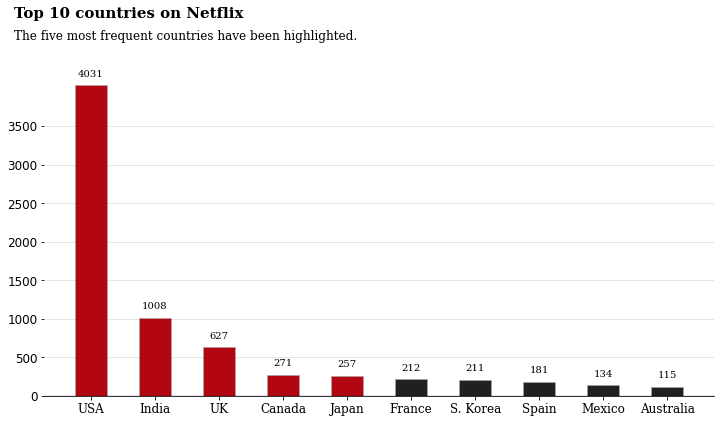




# 국가별 인기배우/인기감독/인기장르
- rating과 각 항목의 상관 관계를 이용하자. 
- 위의 그래프를 참고해서 넷플릭스를 많이 사용하는 Top 5 국가에 한해서 볼 것


## TOP 5
- United States
- India
- UK
- Canada
- Japan


In [21]:
df1 = netfilx_imdb[['director','cast','country','averageRating','genres']]
df1

,director,cast,country,averageRating,genres
0,Kirsten Johnson,NaN,United States,7.4,"Biography,Documentary,Drama"
1,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,7.0,"Action,Crime,Drama"
2,NaN,NaN,NaN,6.7,"Documentary,Reality-TV"
3,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,6.9,"Adventure,Animation,Comedy"
4,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",7.0,Drama
...,...,...,...,...,...
5312,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,9.0,Romance
5313,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,7.7,"Crime,Drama,Mystery"
5314,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,7.6,"Action,Comedy,Horror"
5315,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,4.3,"Action,Adventure,Comedy"


In [23]:
# Replacments
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['director'].replace(np.nan, 'No Data',inplace  = True)

# Drops

df.dropna(inplace=True)

# Drop Duplicates

df.drop_duplicates(inplace= True)

In [24]:
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['first_country'].head()

# Rating ages from this notebook: https://www.kaggle.com/andreshg/eda-beginner-to-expert-plotly
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['target_ages'] = df['rating'].replace(ratings_ages)
df['target_ages'].unique()

df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 

df['first_country'].replace('United States', 'USA', inplace=True)
df['first_country'].replace('United Kingdom', 'UK',inplace=True)
df['first_country'].replace('India','ID', inplace=True)
df['first_country'].replace('Canada','CA', inplace=True)
df['first_country'].replace('Japan','JP', inplace=True)


In [25]:
usa = df[df['first_country']=='USA']
uk = df[df['first_country']=='UK']
id = df[df['first_country']=='ID']
ca = df[df['first_country']=='CA']
jp = df[df['first_country']=='JP']

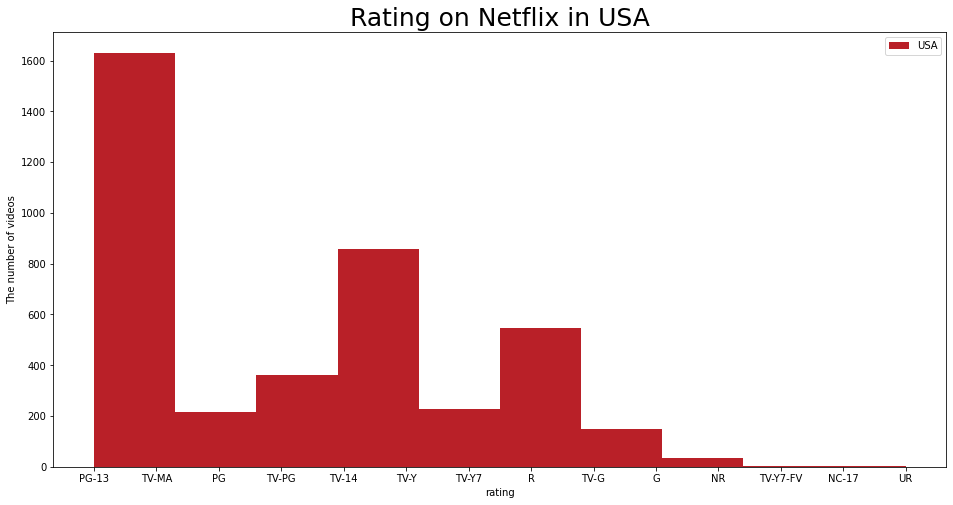

In [40]:
data = usa.groupby('first_country')['rating']
fig, ax = plt.subplots(figsize=(16, 8))

color = ["#b20710", "#221f1f"]

data.hist(alpha=0.9, ax=ax, legend=True, color='#b20710', grid=False)


plt.title('Rating on Netflix in USA', fontsize=25)
          
plt.xlabel("rating")
plt.ylabel('The number of videos')
plt.xticks()


plt.show()


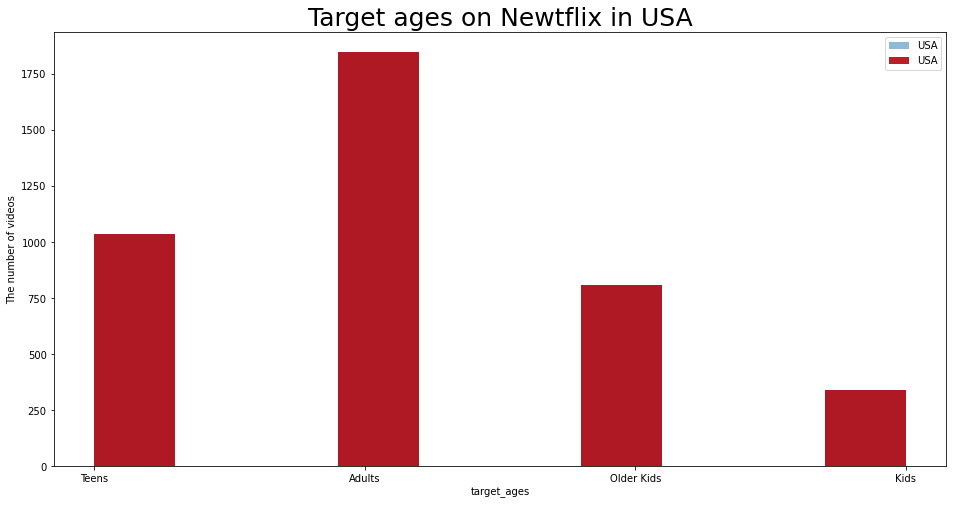

In [48]:
data = usa.groupby('first_country')['target_ages']
fig, ax = plt.subplots(figsize=(16, 8))
data.hist(alpha=0.5, ax=ax, legend=True)

color = ["#b20710", "#221f1f"]

data.hist(alpha=0.9, ax=ax, legend=True, color='#b20710', grid=False)


plt.title('Target ages on Newtflix in USA', fontsize=25)
          
plt.xlabel("target_ages")
plt.xticks([0,1,2,3])
plt.ylabel('The number of videos')

plt.show()

In [33]:
uk = df[df['first_country']=='UK']

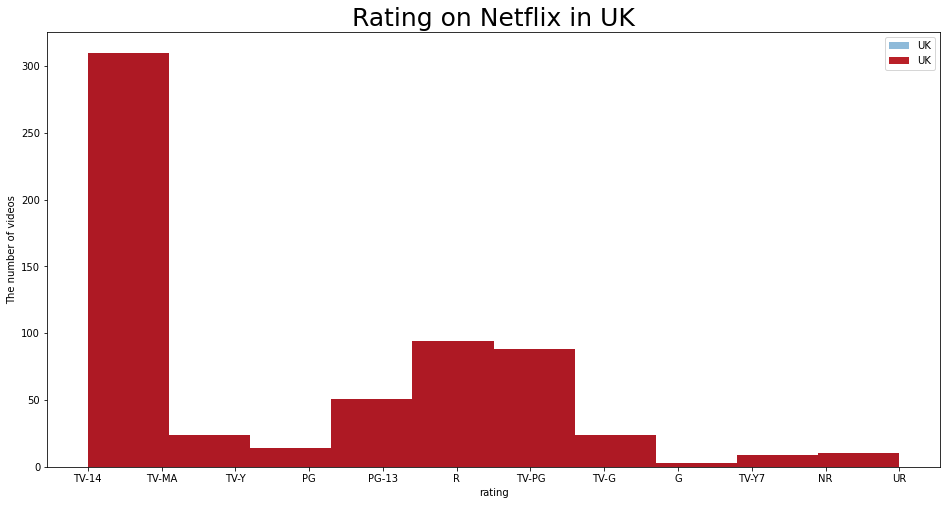

In [34]:
data = uk.groupby('first_country')['rating']
fig, ax = plt.subplots(figsize=(16, 8))
data.hist(alpha=0.5, ax=ax, legend=True)

color = ["#b20710", "#221f1f"]

data.hist(alpha=0.9, ax=ax, legend=True, color='#b20710', grid=False)


plt.title('Rating on Netflix in UK', fontsize=25)
          
plt.xlabel("rating")

plt.ylabel('The number of videos')

plt.show()

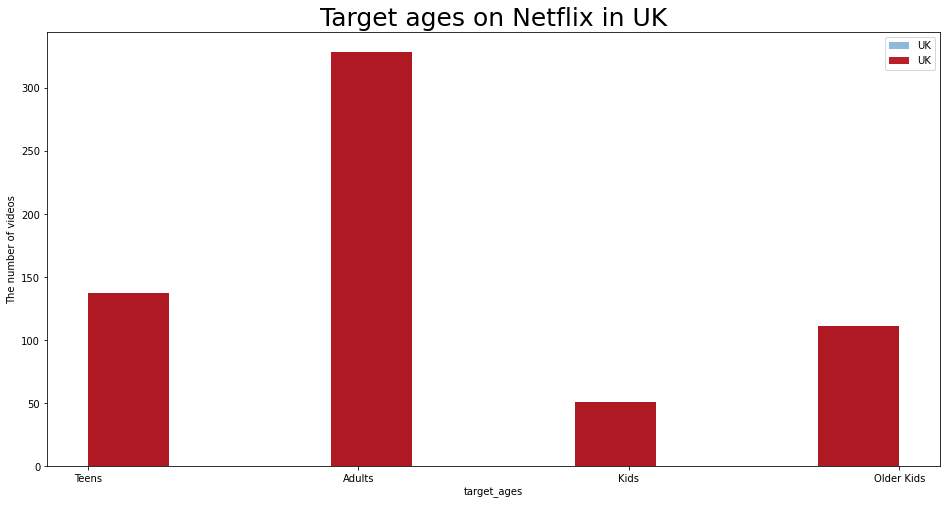

In [35]:
data = uk.groupby('first_country')['target_ages']
fig, ax = plt.subplots(figsize=(16, 8))
data.hist(alpha=0.5, ax=ax, legend=True)

color = ["#b20710", "#221f1f"]

data.hist(alpha=0.9, ax=ax, legend=True, color='#b20710', grid=False)


plt.title('Target ages on Netflix in UK', fontsize=25)

plt.xlabel("target_ages")

plt.ylabel('The number of videos')

plt.show()

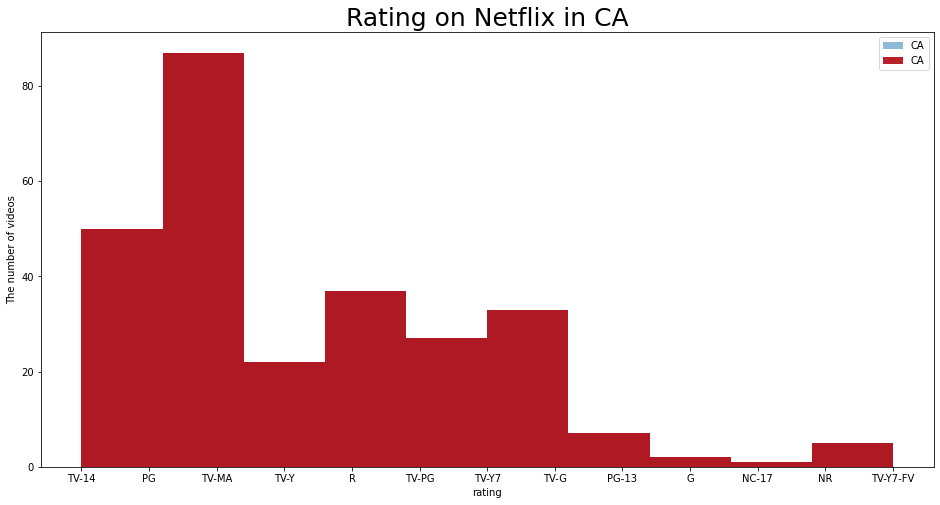

In [36]:
data = ca.groupby('first_country')['rating']
fig, ax = plt.subplots(figsize=(16, 8))
data.hist(alpha=0.5, ax=ax, legend=True)

color = ["#b20710", "#221f1f"]

data.hist(alpha=0.9, ax=ax, legend=True, color='#b20710', grid=False)


plt.title('Rating on Netflix in CA', fontsize=25)

plt.xlabel("rating")

plt.ylabel('The number of videos')

plt.show()

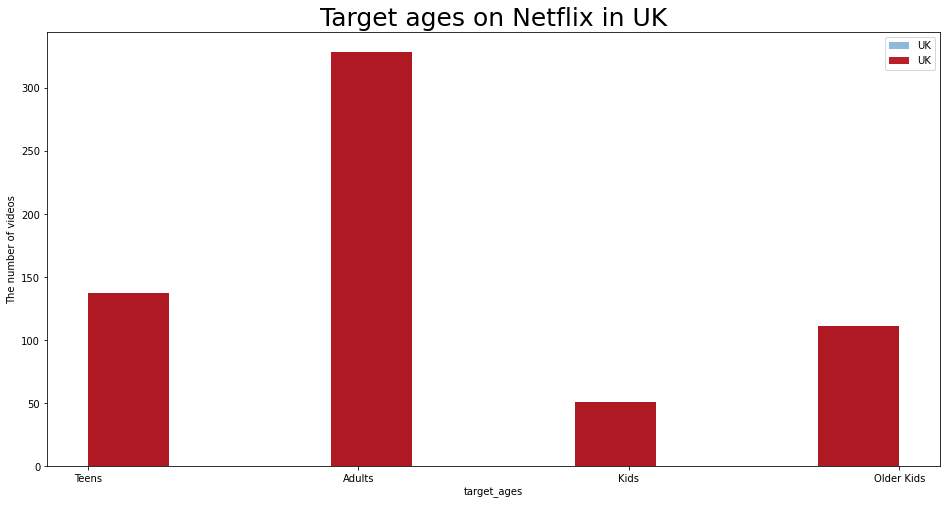

In [37]:
data = uk.groupby('first_country')['target_ages']
fig, ax = plt.subplots(figsize=(16, 8))
data.hist(alpha=0.5, ax=ax, legend=True)

color = ["#b20710", "#221f1f"]

data.hist(alpha=0.9, ax=ax, legend=True, color='#b20710', grid=False)

plt.title('Target ages on Netflix in UK', fontsize=25)

plt.xlabel("target_ages")

plt.ylabel('The number of videos')

plt.show()

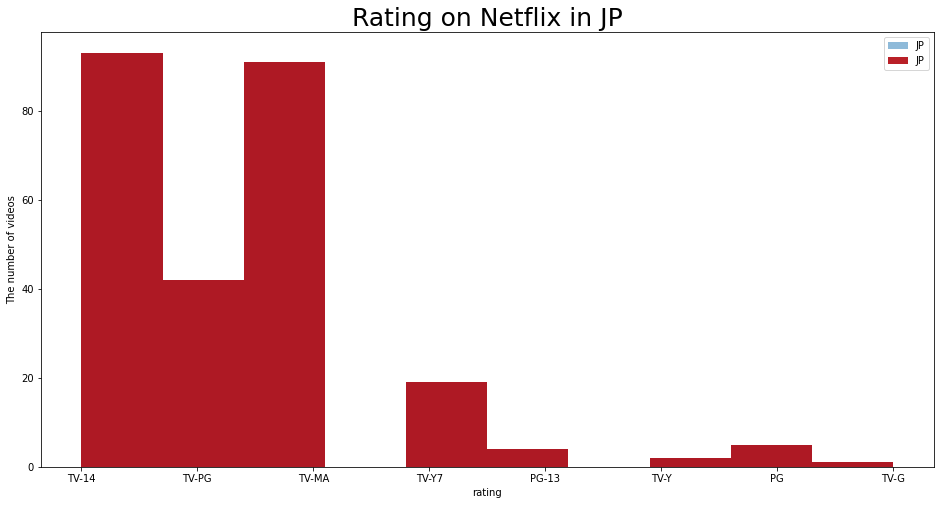

In [38]:
data = jp.groupby('first_country')['rating']
fig, ax = plt.subplots(figsize=(16, 8))
data.hist(alpha=0.5, ax=ax, legend=True)

color = ["#b20710", "#221f1f"]

data.hist(alpha=0.9, ax=ax, legend=True, color='#b20710', grid=False)


plt.title('Rating on Netflix in JP', fontsize=25)

plt.xlabel("rating")

plt.ylabel('The number of videos')

plt.show()

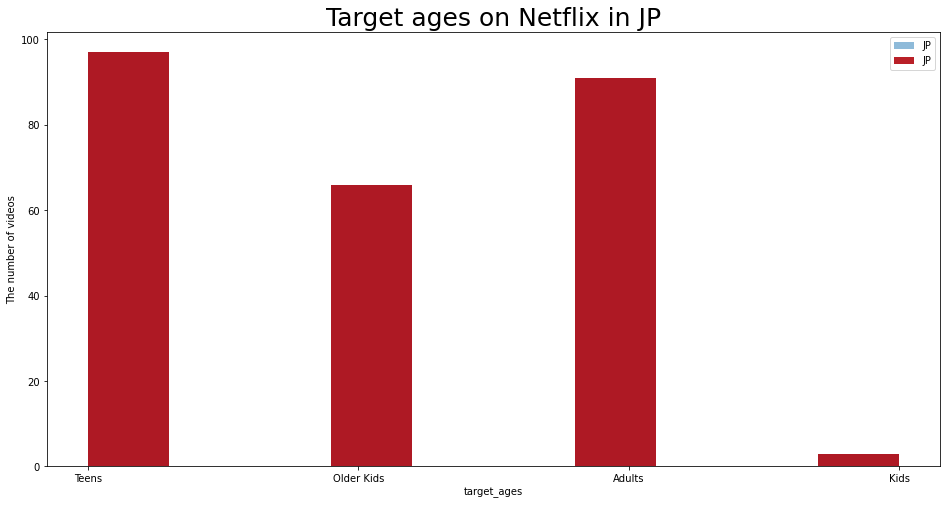

In [39]:
data = jp.groupby('first_country')['target_ages']
fig, ax = plt.subplots(figsize=(16, 8))
data.hist(alpha=0.5, ax=ax, legend=True)

color = ["#b20710", "#221f1f"]

data.hist(alpha=0.9, ax=ax, legend=True, color='#b20710', grid=False)


plt.title('Target ages on Netflix in JP', fontsize=25)

plt.xlabel("target_ages")

plt.ylabel('The number of videos')

plt.show()